In [1]:
import pandas as pd
import numpy as np
import csv
import json
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
import os
import scipy.stats as sp
import random

# Download Data

## Pairwise data

In [2]:
input_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
def average_pairwise(label):
    path = './data/japanese/similarity/pairwise_distance_'
    v1 = pd.read_csv(path+label+input_categories[0]+'.csv',header=None)
    v2 = pd.read_csv(path+label+input_categories[1]+'.csv',header=None)
    v3 = pd.read_csv(path+label+input_categories[2]+'.csv',header=None)
    v4 = pd.read_csv(path+label+input_categories[3]+'.csv',header=None)
    v5 = pd.read_csv(path+label+input_categories[4]+'.csv',header=None)
    v6 = pd.read_csv(path+label+input_categories[5]+'.csv',header=None)
    v7 = pd.read_csv(path+label+input_categories[6]+'.csv',header=None)
    v8 = pd.read_csv(path+label+input_categories[7]+'.csv',header=None)
    v9 = pd.read_csv(path+label+input_categories[8]+'.csv',header=None)
    v10 = pd.read_csv(path+label+input_categories[9]+'.csv',header=None)
    average = pd.concat([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10]).groupby(level=0).mean().fillna(0)
    average.to_csv('./output/japan/similarity/'+label+'_average_distance.csv',index=False)
for i in range(6):
    average_pairwise(str(i))

## Feature Data
A utility function to read the feature annotations

In [3]:
def get_files(group):
    entries = os.listdir('./data/japanese/evaluation/')
    files = [entry for entry in entries if str(group) in entry]
    return files

In [4]:
PATH = './data/japanese/evaluation/evaluation_'

def format_feature(group, participant):
    df = pd.read_csv(PATH+str(group)+participant+'.csv', header=None, index_col=0)
    if 14 in df.columns:
        df = df.drop(14, axis=1)
    return df

## Feature Distance matrix
A utility function to convert the songwise features into a distance matrix within a 0 to 1 range

In [5]:
def save_full_feature_distance(participant):
    full_matrix = format_feature(0, participant)
    for i in range(1,6):
            full_matrix = np.concatenate([full_matrix, format_feature(i, participant)], axis=0)
    distance_matrix = pd.DataFrame(get_feature_distance(full_matrix))
    distance_matrix.to_csv('./output/japan/feature/'+participant+'_feature.csv', index=False)

In [6]:
def get_feature_distance(input_data):
    data = squareform(pdist(input_data, metric='euclidean'))
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [7]:
for i in range(6):
    files = get_files(i)
    for file in files:
        participant_id = file.split('.')[0][-1]
        data = format_feature(i, participant_id)
        distance = pd.DataFrame(get_feature_distance(data))
        distance.to_csv('./output/japan/feature/'+str(i)+participant_id+'_distance.csv', index=False)

## Get feature distances

In [8]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']

def get_individual_feature(feature_index, participant):
    feature_vector = format_feature(0, participant)[feature_index]
    label = feature_names[feature_index-1].lower().replace(' ', '_')
    for i in range(1,6):
        feature_vector = np.concatenate([feature_vector, format_feature(i, participant)[[feature_index]]], axis=None)
    feature_df = pd.DataFrame(feature_vector, columns=[feature_index])
    feature_distance = pd.DataFrame(get_feature_distance(feature_df))
    feature_distance.to_csv('./output/japan/feature/'+label+'_'+participant+'.csv', index=False)
for cluster in input_categories:
    for i in range(1, len(feature_names)):
        get_individual_feature(i, cluster)

## Get Average Feature Distance Matrix

In [9]:
input_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
def average_distance_matrix(label):
    path = './output/japan/feature/'
    v1 = pd.read_csv(path+label+'_'+input_categories[0]+'.csv')
    v2 = pd.read_csv(path+label+'_'+input_categories[1]+'.csv')
    v3 = pd.read_csv(path+label+'_'+input_categories[2]+'.csv')
    v4 = pd.read_csv(path+label+'_'+input_categories[3]+'.csv')
    v5 = pd.read_csv(path+label+'_'+input_categories[4]+'.csv')
    v6 = pd.read_csv(path+label+'_'+input_categories[5]+'.csv')
    v7 = pd.read_csv(path+label+'_'+input_categories[6]+'.csv')
    v8 = pd.read_csv(path+label+'_'+input_categories[7]+'.csv')
    v9 = pd.read_csv(path+label+'_'+input_categories[8]+'.csv')
    v10 = pd.read_csv(path+label+'_'+input_categories[9]+'.csv')
    average = pd.concat([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10]).groupby(level=0).mean()
    average.to_csv('./output/japan/feature/'+label+'_average.csv', index=False)
    
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    average_distance_matrix(label)

## Correlation

sig 0.0022402624065292745


In [20]:
print(p, r)

0.08038783656406388 0.22753796649070326


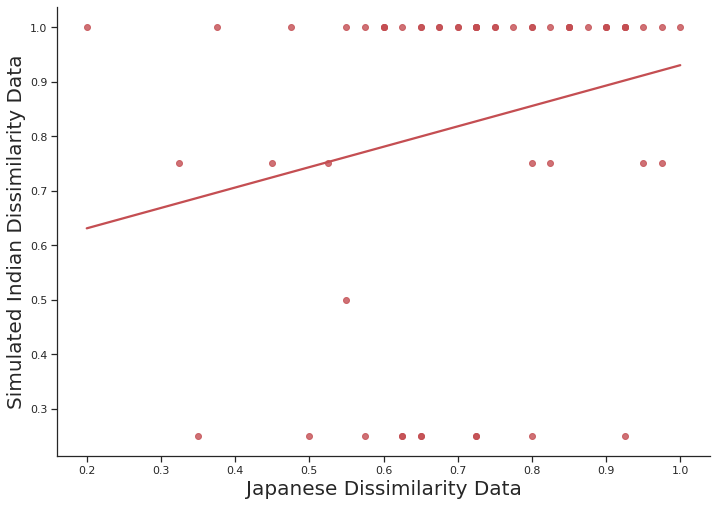

0.05 0.71
0.07 0.59
-0.05 0.72
0.04 0.78
0.08 0.55
0.14 0.29
0.11 0.39
0.15 0.26
0.19 0.16
0.02 0.89
0.24 0.07
0.07 0.61
-0.05 0.68
